# 📌 در این سلول کتابخانه‌های مورد نیاز مثل NumPy و matplotlib برای پردازش داده‌ها و رسم نمودارها فراخوانی می‌شوند.


In [ ]:
# !pip install --upgrade --no-cache-dir gdown
# !gdown 1QTi7dJtNAfFR5mG0rd8K3ZGvEIfSn_DS
# !unzip PersianData.zip

Downloading...
From: https://drive.google.com/uc?id=1QTi7dJtNAfFR5mG0rd8K3ZGvEIfSn_DS
To: /content/PersianData.zip
100% 7.46k/7.46k [00:00<00:00, 40.9MB/s]
Archive:  PersianData.zip
replace 1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


Import libaries

In [ ]:
import numpy as np
from PIL import Image, ImageDraw
import random
import os
import matplotlib.pyplot as plt

Primary functions

# 📌 این تابع تصویر ورودی را به داده‌های باینری (صفر و یک) تبدیل می‌کند. هر پیکسل تیره ۱ و روشن ۰ در نظر گرفته می‌شود.


In [ ]:
def convertImageToBinary(path):
    """
    Convert an image to a binary representation based on pixel intensity.

    Args:
        path (str): The file path to the input image.

    Returns:
        list: A binary representation of the image where white is represented by -1 and black is represented by 1.
    """
    # Open the image file.
    image = Image.open(path)

    # Create a drawing tool for manipulating the image.
    draw = ImageDraw.Draw(image)

    # Determine the image's width and height in pixels.
    width = image.size[0]
    height = image.size[1]

    # Load pixel values for the image.
    pix = image.load()

    # Define a factor for intensity thresholding.
    factor = 100

    # Initialize an empty list to store the binary representation.
    binary_representation = []

    # Loop through all pixels in the image.
    for i in range(width):
        for j in range(height):
            # Extract the Red, Green, and Blue (RGB) values of the pixel.
            red = pix[i, j][0]
            green = pix[i, j][1]
            blue = pix[i, j][2]

            # Calculate the total intensity of the pixel.
            total_intensity = red + green + blue

            # Determine whether the pixel should be white or black based on the intensity.
            if total_intensity > (((255 + factor) // 2) * 3):
                red, green, blue = 255, 255, 255  # White pixel
                binary_representation.append(-1)
            else:
                red, green, blue = 0, 0, 0  # Black pixel
                binary_representation.append(1)

            # Set the pixel color accordingly.
            draw.point((i, j), (red, green, blue))

    # Clean up the drawing tool.
    del draw

    # Return the binary representation of the image.
    return binary_representation

# 📌 در این سلول ماتریس‌های باینری مربوط به ۵ حرف الفبای فارسی (آ، ب، ج، د، و) تعریف شده‌اند.


In [ ]:
from PIL import Image, ImageDraw
import random

def generateNoisyImages():
    # List of image file paths
    image_paths = [
        "/content/1.jpg",
        "/content/2.jpg",
        "/content/3.jpg",
        "/content/4.jpg",
        "/content/5.jpg"
    ]

    for i, image_path in enumerate(image_paths, start=1):
        noisy_image_path = f"/content/noisy{i}.jpg"
        getNoisyBinaryImage(image_path, noisy_image_path)
        print(f"Noisy image for {image_path} generated and saved as {noisy_image_path}")

def getNoisyBinaryImage(input_path, output_path):
    """
    Add noise to an image and save it as a new file.

    Args:
        input_path (str): The file path to the input image.
        output_path (str): The file path to save the noisy image.
    """
    # Open the input image.
    image = Image.open(input_path)

    # Create a drawing tool for manipulating the image.
    draw = ImageDraw.Draw(image)

    # Determine the image's width and height in pixels.
    width = image.size[0]
    height = image.size[1]

    # Load pixel values for the image.
    pix = image.load()

    # Define a factor for introducing noise.
    noise_factor = 10000000

    # Loop through all pixels in the image.
    for i in range(width):
        for j in range(height):
            # Generate a random noise value within the specified factor.
            rand = random.randint(-noise_factor, noise_factor)

            # Add the noise to the Red, Green, and Blue (RGB) values of the pixel.
            red = pix[i, j][0] + rand
            green = pix[i, j][1] + rand
            blue = pix[i, j][2] + rand

            # Ensure that RGB values stay within the valid range (0-255).
            if red < 0:
                red = 0
            if green < 0:
                green = 0
            if blue < 0:
                blue = 0
            if red > 255:
                red = 255
            if green > 255:
                green = 255
            if blue > 255:
                blue = 255

            # Set the pixel color accordingly.
            draw.point((i, j), (red, green, blue))

    # Save the noisy image as a file.
    image.save(output_path, "JPEG")

    # Clean up the drawing tool.
    del draw

# Generate noisy images and save them
# generateNoisyImages()


Final functions

# 📌 این سلول تصاویر اصلی پنج حرف الفبا را بدون نویز نمایش می‌دهد تا بتوانیم داده‌های اولیه را مشاهده کنیم.


In [ ]:
def convertImageToBinary(path: str, factor: int=100, output_path : str = None):
    """
    Convert an image to a binary representation based on pixel intensity.

    Args:
        path (str): The file path to the input image.
    factor (int, optional):
        Adjusts the binarization threshold (Default: 100).
    Returns:
        list: A binary representation of the image where white is represented by -1 and black is represented by 1.
    """
    with Image.open(path) as img:
        image = img.convert("RGB")

    img_array = np.array(image)
    intensity = img_array.sum(axis=2)
    threshold = ((255 + factor) // 2) * 3
    binary_representation = np.where(intensity > threshold, -1, 1).flatten()
    if output_path:
      binarized_array = np.where(intensity > threshold, 255, 0)
      binarized_array = np.stack([binarized_array]*3, axis=-1)
      binarized_image = Image.fromarray(binarized_array.astype("uint8"), "RGB")
      binarized_image.save(output_path, 'JPEG')
      return binary_representation
    else:  return binary_representation


# 📌 در این سلول تابعی تعریف شده که با احتمال مشخص، نویز (تغییر ۰ به ۱ یا برعکس) به داده‌های باینری اضافه می‌کند.


In [ ]:
def getNoisyBinaryImage(input_path, output_path, noise_factor=10000000, random_state=None):
    """
    Add noise to an image and save it as a new file.

    Args:
        input_path (str): The file path to the input image.
        output_path (str): The file path to save the noisy image.
        noise_factor (int): Amplitude of noise (default: 10,000,000).
        random_state (int/None): Seed for reproducibility. If None, uses true randomness.
    """
    with Image.open(input_path) as img:
        image = img.convert("RGB")

    img_array = np.array(image)
    if random_state is not None:
        np.random.seed(random_state)

    rand = np.random.randint(-noise_factor, noise_factor, img.size[0:2])
    red = img_array[:, :, 0] + rand
    red[red > 255] = 255
    red[red < 0] = 0
    green = img_array[:, :, 1] + rand
    green[green > 255] = 255
    green[green < 0] = 0
    blue = img_array[:, :, 2] + rand
    blue[blue > 255] = 255
    blue[blue < 0] = 0
    noise_image = np.stack((red, green, blue), axis=2)
    noise_image = Image.fromarray(noise_image.astype("uint8"), "RGB")
    noise_image.save(output_path, "JPEG")

# 📌 در این سلول برای هر حرف الفبا، چند نمونه نویزی ساخته شده و سپس با نمودارهای تصویری نمایش داده شده‌اند.


In [ ]:
def generateNoisyImages(noise_factor=10000000, random_state = None):
    # List of image file paths
    image_paths = [
        "1.jpg",
        "2.jpg",
        "3.jpg",
        "4.jpg",
        "5.jpg"
    ]

    os.makedirs('noisy', exist_ok=True)
    for i, image_path in enumerate(image_paths, start=1):
        noisy_image_path = f"noisy/noisy{i}.jpg"
        getNoisyBinaryImage(image_path, noisy_image_path, noise_factor, random_state)
        print(f"Noisy image for {image_path} generated and saved as {noisy_image_path}")

In [ ]:
def BinarytoImage(binary_img):
    binary_img = np.array(binary_img)
    img = np.where(binary_img == -1, 255, 0)
    img = img.reshape(96,96)
    img = np.stack([img]*3, axis=2)
    img = Image.fromarray(img.astype("uint8"), "RGB")
    # img.save(output_path, "JPEG")
    return img

Hamming network

# 📌 این سلول شبکه هامینگ را پیاده‌سازی می‌کند که با استفاده از شباهت بین نمونه ورودی و نمونه‌های اصلی، حرف را تشخیص می‌دهد.


In [ ]:
class HammingNetwork:
    def __init__(self, patterns):
        self.patterns = np.array([p for p in patterns])
        self.n_classes = len(patterns)

    def predict(self, x_noisy):
        similarities = np.dot(self.patterns, x_noisy)
        return self.patterns[np.argmax(similarities)]

In [ ]:
images = [convertImageToBinary(f'{i}.jpg') for i in range(1,6)]
model = HammingNetwork(images)

In [ ]:
generateNoisyImages(1100, 93)
paths = [f'noisy/noisy{i}.jpg' for i in range(1,6)]
noise = [convertImageToBinary(f'{i}') for i in paths]

Noisy image for 1.jpg generated and saved as noisy/noisy1.jpg
Noisy image for 2.jpg generated and saved as noisy/noisy2.jpg
Noisy image for 3.jpg generated and saved as noisy/noisy3.jpg
Noisy image for 4.jpg generated and saved as noisy/noisy4.jpg
Noisy image for 5.jpg generated and saved as noisy/noisy5.jpg


# 📌 در این سلول، شبکه هامینگ روی نمونه‌های نویزی اجرا می‌شود و بررسی می‌شود که آیا حروف نویزی به درستی شناسایی می‌شوند یا نه.


In [ ]:
def show_images(noise, predictions):
    fig, axes = plt.subplots(2, 5, figsize=(15, 5))
    for i in range(5):
        n = noise[i]
        p = predictions[i]
        axes[0, i].imshow(n, cmap='gray')
        axes[0, i].set_title(f"Noisy {i+1}")
        axes[0, i].axis('off')

        axes[1, i].imshow(p, cmap='gray')
        axes[1, i].set_title(f"Prediction {i+1}")
        axes[1, i].axis('off')

    plt.tight_layout()
    plt.show()

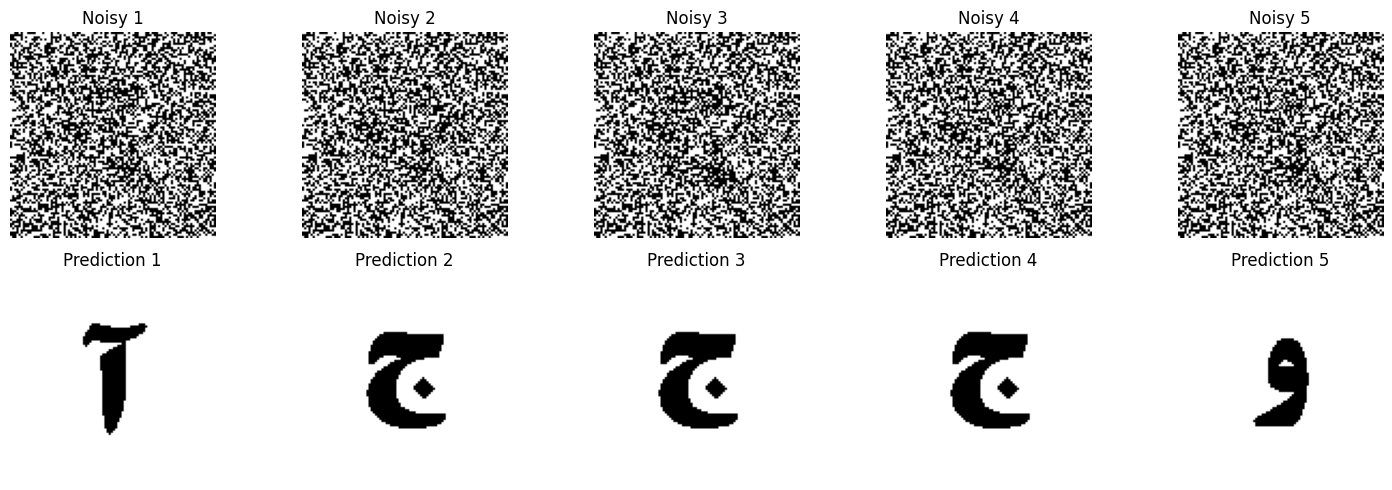

In [ ]:
per = [model.predict(noise[i]) for i in range(5)]
noise_img = [BinarytoImage(noise[i]) for i in range(5)]
per_img = [BinarytoImage(per[i]) for i in range(5)]
show_images(noise_img, per_img)

# 📌 این سلول تابعی تعریف می‌کند که به صورت تصادفی بخشی از پیکسل‌های تصویر را حذف (مقدار صفر یا نامشخص) می‌کند.


Miss value

In [ ]:
def missimage(input_path,output_path, percent=20, factor = 100, random_state=None):
    with Image.open(input_path) as img:
        image = img.convert("RGB")

    img_array = np.array(image)
    intensity = img_array.sum(axis=2)
    threshold = ((255 + factor) // 2) * 3
    blackpix = np.where(intensity < threshold)
    number = round(len(blackpix[0])*percent/100)
    if random_state is not None:
        np.random.seed(random_state)

    pixels_to_flip = np.random.choice(range(len(blackpix[0])), size=number, replace=False)
    img_array[blackpix[0][pixels_to_flip], blackpix[1][pixels_to_flip]] = 255
    img = Image.fromarray(img_array.astype("uint8"), "RGB")
    img.save(output_path, "JPEG")

In [ ]:
def generatemissimage(percent=20, factor = 100, random_state=None):
    # List of image file paths
    image_paths = [
        "1.jpg",
        "2.jpg",
        "3.jpg",
        "4.jpg",
        "5.jpg"
    ]
    os.makedirs('miss', exist_ok=True)
    for i, image_path in enumerate(image_paths, start=1):
        miss_image_path = f"miss/miss{i}.jpg"
        missimage(image_path, miss_image_path,percent, factor, random_state)
        print(f"Miss image for {image_path} generated and saved as {miss_image_path}")

# 📌 در این سلول با افزایش درصد نقاط حذف‌شده (Missing Points)، بررسی می‌شود که آیا شبکه هامینگ هنوز می‌تواند حروف را به‌درستی تشخیص دهد یا خیر. سپس شبکه بازنویسی شده با قابلیت نادیده گرفتن پیکسل‌های نامشخص نیز تست می‌شود.


In [ ]:
generatemissimage(70,100,93)
paths=[f'miss/miss{i}.jpg' for i in range(1,6)]
miss=[convertImageToBinary(i) for i in paths]

Miss image for 1.jpg generated and saved as miss/miss1.jpg
Miss image for 2.jpg generated and saved as miss/miss2.jpg
Miss image for 3.jpg generated and saved as miss/miss3.jpg
Miss image for 4.jpg generated and saved as miss/miss4.jpg
Miss image for 5.jpg generated and saved as miss/miss5.jpg


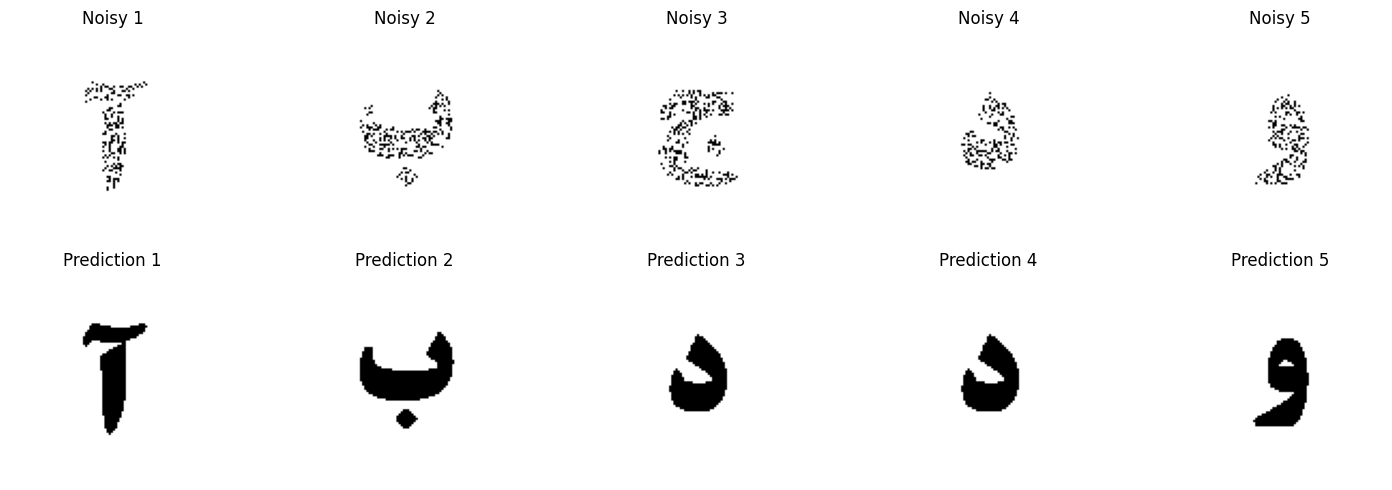

In [ ]:
per = [model.predict(miss[i]) for i in range(5)]
miss_img = [BinarytoImage(miss[i]) for i in range(5)]
per_img = [BinarytoImage(per[i]) for i in range(5)]
show_images(miss_img, per_img)

In [ ]:
class HammingNetwork:
    def __init__(self, patterns):
        self.patterns = np.array([p for p in patterns])
        self.n_classes = len(patterns)

    def masked_dot(self, a, b, mask):
        return np.dot(a[mask], b[mask])

    def predict(self, x_noisy):
        mask = x_noisy != -1
        similarities = [self.masked_dot(p, x_noisy, mask) for p in self.patterns]
        return self.patterns[np.argmax(similarities)]

model = HammingNetwork(images)

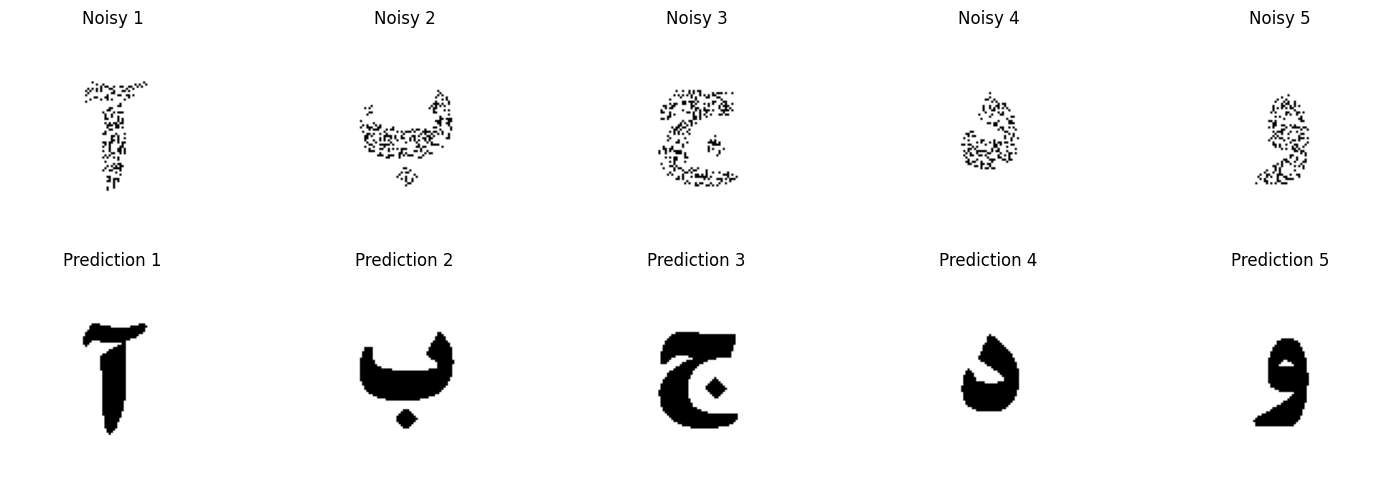

In [ ]:
per = [model.predict(miss[i]) for i in range(5)]
miss_img = [BinarytoImage(miss[i]) for i in range(5)]
per_img = [BinarytoImage(per[i]) for i in range(5)]
show_images(miss_img, per_img)